In [233]:
import pandas as pd

# !git clone https://github.com/taehojo/data.git

In [234]:
#Pandas로 데이터 읽기
df_iris = pd.read_csv('./data/iris3.csv')

#head()로 데이터 확인하기
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


붓꽃데이터 컬럼 정보 :
1. sepal_length, width : 꽃받침의 길이, 너비 정보
2. peta_length, width : 꽃잎의 길이, 너비 정보

### 1. head(), value_counts(), describe()로 데이터 확인하기

In [235]:
#value_counts()로 데이터 확인하기
df_iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [236]:
#describe()로 데이터 확인하기
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Seaborn 라이브러리를 사용하여 정보간 상관관계 그래프 그리기

In [237]:
df_iris_num = df_iris.drop(['species'], axis=1)
df_iris_num.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


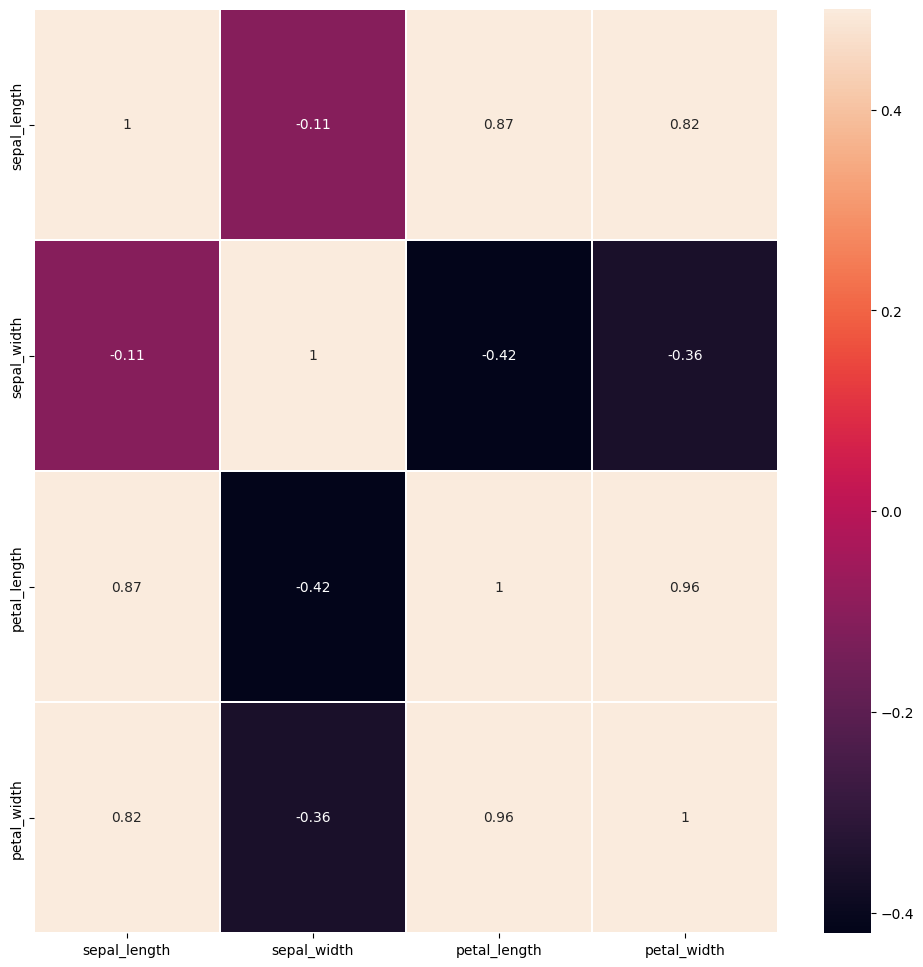

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# colormap = plt.cm.gist_heat #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12)) #그래프의 크기를 정합니다.

#상관관계 그래프 그리기
sns.heatmap(df_iris_num.corr(), linewidths=0.1, vmax=0.5, linecolor='white', annot=True)
plt.show()


### 3. 상관관계가 높은 항목을 histogram으로 어떻게 분포되는지 그려보기

(array([[ 0.,  0.,  2., 21., 25.,  2.,  0.,  0.,  1.,  4.,  3., 11., 18.,
         12., 17.,  9., 12.,  7.,  2.,  4.],
        [48.,  2., 10., 26., 30., 17., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ,
        3.84, 4.18, 4.52, 4.86, 5.2 , 5.54, 5.88, 6.22, 6.56, 6.9 ]),
 <a list of 2 BarContainer objects>)

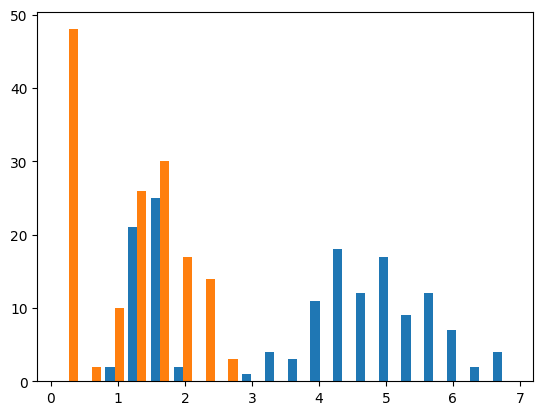

In [239]:
plt.hist(x=[df_iris['petal_length'], df_iris['petal_width']], bins=20)

In [240]:
#petal_length와 petal_width MinMax 정규화하기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_iris[['petal_length', 'petal_width']] = scaler.fit_transform(df_iris[['petal_length', 'petal_width']])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,0.067797,0.041667,Iris-setosa
1,4.9,3.0,0.067797,0.041667,Iris-setosa
2,4.7,3.2,0.050847,0.041667,Iris-setosa
3,4.6,3.1,0.084746,0.041667,Iris-setosa
4,5.0,3.6,0.067797,0.041667,Iris-setosa


(array([[ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
         17.,  6., 12.,  7.,  4.,  2.,  3.],
        [34.,  7.,  7.,  1.,  1.,  0.,  0.,  7.,  3.,  5., 21., 12.,  4.,
          2., 12., 11.,  6.,  3.,  8.,  6.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

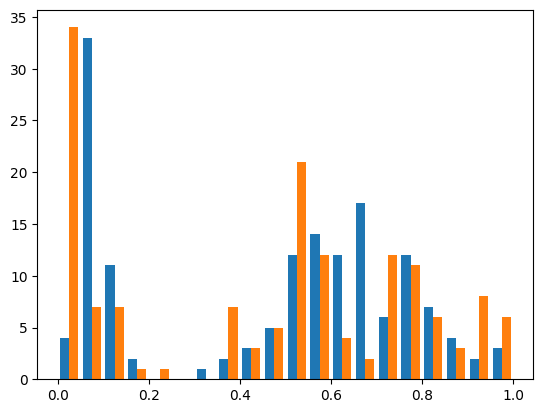

In [241]:
plt.hist(x=[df_iris['petal_length'], df_iris['petal_width']], bins=20)

### 4. 산점도로 종별 분포 확인하기

/Users/nedstar/miniforge3/envs/tf-env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


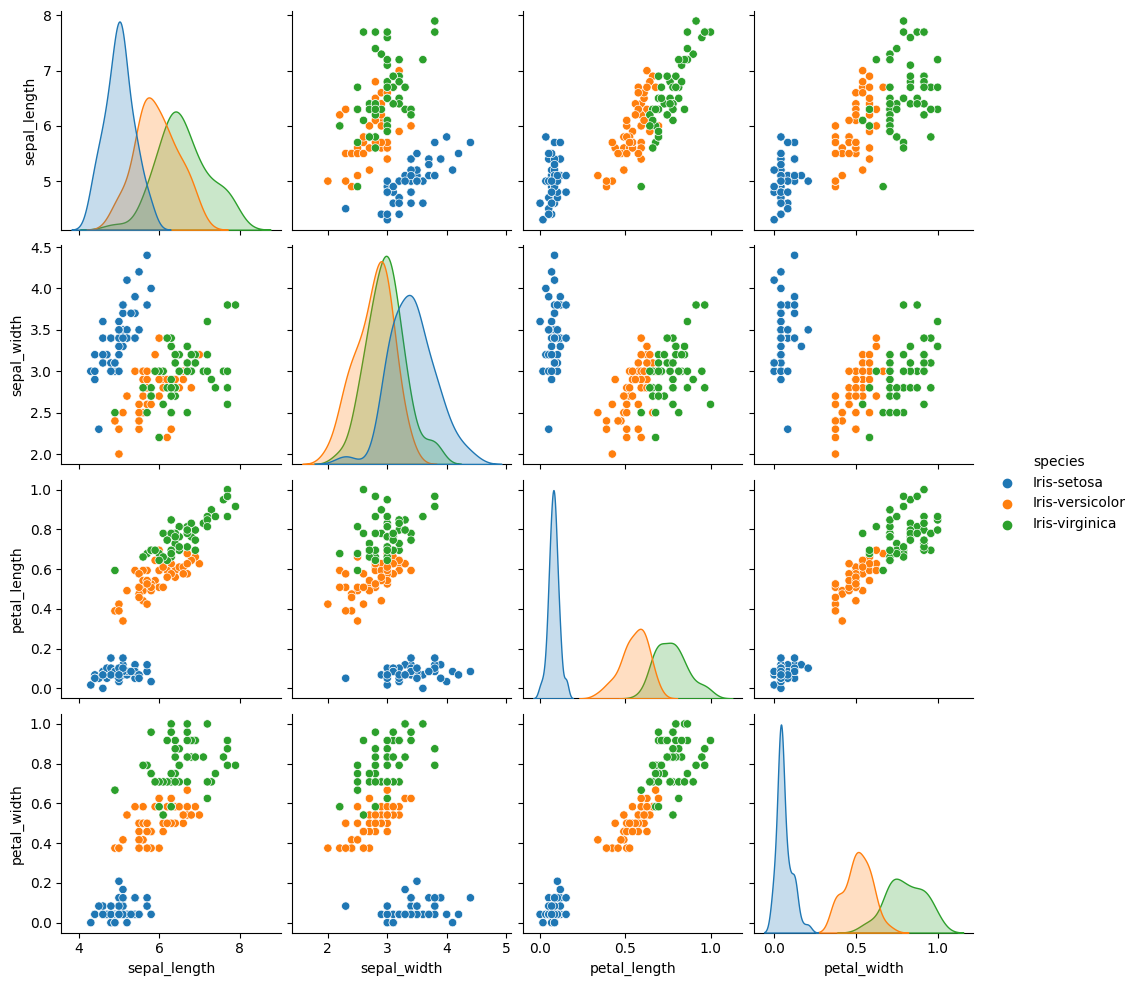

In [242]:
#산점도로 종별 분포 확인하기
sns.pairplot(df_iris, hue='species')
plt.show()

### 5. 딥러닝 모델을 사용하여 붓꽃의 종(species) 예측하기

In [243]:
df_iris = pd.read_csv('./data/iris3.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


species 컬럼에 대한 원-핫 인코딩

In [244]:
df_iris = pd.get_dummies(df_iris, columns=['species'])
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [245]:
x = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris.iloc[:, -3:]
print(x.shape, y.shape)
y

(150, 4) (150, 3)


,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [246]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(3, activation='sigmoid', name='Output'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 4)                 20        
                                                                 
 Dense_2 (Dense)             (None, 8)                 40        
                                                                 
 Output (Dense)              (None, 3)                 27        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [247]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=20, batch_size=1)

Epoch 1/20


2023-10-03 12:58:22.319254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 8s 48ms/step - loss: 1.1681 - accuracy: 0.3533
Epoch 2/20
150/150 [==============================] - 7s 46ms/step - loss: 0.9807 - accuracy: 0.4467
Epoch 3/20
150/150 [==============================] - 7s 47ms/step - loss: 0.9187 - accuracy: 0.4200
Epoch 4/20
150/150 [==============================] - 7s 48ms/step - loss: 0.8656 - accuracy: 0.6267
Epoch 5/20
150/150 [==============================] - 7s 47ms/step - loss: 0.8089 - accuracy: 0.7200
Epoch 6/20
150/150 [==============================] - 7s 46ms/step - loss: 0.7515 - accuracy: 0.7667
Epoch 7/20
150/150 [==============================] - 7s 47ms/step - loss: 0.6953 - accuracy: 0.7267
Epoch 8/20
150/150 [==============================] - 7s 46ms/step - loss: 0.6470 - accuracy: 0.7867
Epoch 9/20
150/150 [==============================] - 7s 47ms/step - loss: 0.6013 - accuracy: 0.8200
Epoch 10/20
150/150 [==============================] - 7s 48ms/step - loss: 0.5585 - accuracy: 0.8400


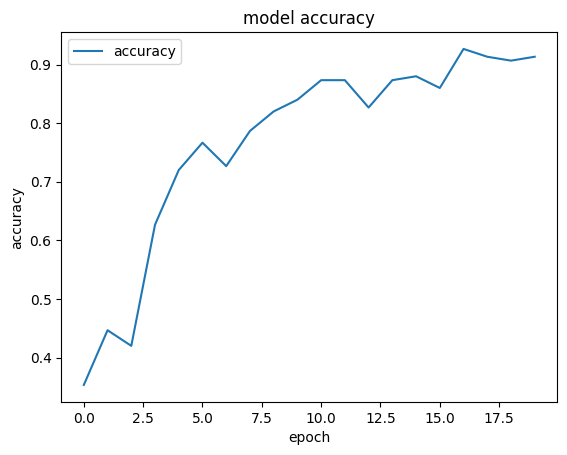

In [248]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.legend(['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

### 6. 딥러닝 모델을 사용하여 꽃잎의 길이, 너비 예측하기

In [298]:
df_iris = pd.read_csv('./data/iris3.csv')

df_iris['species_encoded'] = pd.factorize(df_iris['species'])[0]

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [365]:
x = df_iris[['petal_length', 'petal_width']]
y = df_iris[['sepal_length', 'sepal_width']]

In [366]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='relu', name='Dense_1'))
model2.add(Dense(6, activation='relu', name='Dense_2'))
model2.add(Dense(12, activation='relu', name='Dense_3'))
model2.add(Dense(2, activation='linear', name='Output'))
model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 2)                 6         
                                                                 
 Dense_2 (Dense)             (None, 6)                 18        
                                                                 
 Dense_3 (Dense)             (None, 12)                84        
                                                                 
 Output (Dense)              (None, 2)                 26        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10


2023-10-03 14:01:55.773697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 3s 8ms/step - loss: 21.5795 - accuracy: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 19.0057 - accuracy: 0.0000e+00
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 14.3191 - accuracy: 0.0000e+00
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 6.5319 - accuracy: 0.4467
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 1.9637 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 1.2613 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 1.1906 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 1.1302 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 1.0670 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 0s 8ms/step - loss: 1.0139 - accuracy: 1.0000


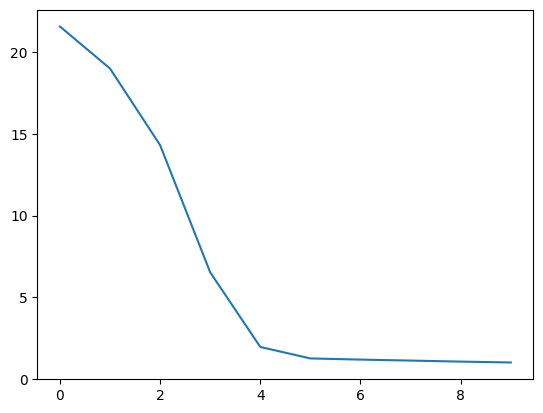

In [367]:
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x, y, epochs=10, batch_size=3)

plt.plot(history2.history['loss'])

In [368]:
#새로운 데이터로 예측하기
new_x = [[1.5, 0.2, 0], [4.7, 1.4, 1], [5.4, 2.3, 2]]

y_predict = model2.predict(x)
y_predict

2023-10-03 14:02:05.482424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 87ms/step


array([[3.6744032, 1.7503554],
       [3.6744032, 1.7503554],
       [3.5280504, 1.6745394],
       [3.8207555, 1.8261715],
       [3.6744032, 1.7503554],
       [3.7975788, 1.8141652],
       [3.5164623, 1.6685363],
       [3.8207555, 1.8261715],
       [3.6744032, 1.7503554],
       [3.9786968, 1.9079908],
       [3.8207555, 1.8261715],
       [3.9671082, 1.9019877],
       [3.832344 , 1.8321748],
       [3.3932867, 1.6047267],
       [3.3816981, 1.5987234],
       [3.5048742, 1.662533 ],
       [3.2121692, 1.5109009],
       [3.5164623, 1.6685363],
       [3.9555197, 1.8959843],
       [3.662815 , 1.7443523],
       [4.113461 , 1.9778036],
       [3.5048742, 1.662533 ],
       [3.088993 , 1.4470915],
       [3.639638 , 1.7323459],
       [4.4061656, 2.1294355],
       [3.9671082, 1.9019877],
       [3.6512265, 1.7383491],
       [3.8207555, 1.8261715],
       [3.6744032, 1.7503554],
       [3.9671082, 1.9019877],
       [3.9671082, 1.9019877],
       [3.5048742, 1.662533 ],
       [

전체 오차 값:  0.9786273166937739


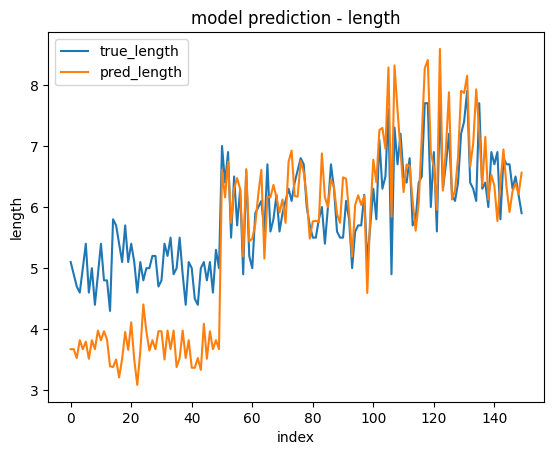

In [369]:
#새로운 데이터 예측값 오차 계산하기

import numpy as np

df_iris['species_encoded'] = pd.factorize(df_iris['species'])[0]

print('전체 오차 값: ', np.mean((y_predict - y)**2))

#새로운 데이터 예측값 시각화하기
plt.plot(y['sepal_length'], label=('true_length'))
plt.plot(y_predict[:, 0], label=('pred_length'))

plt.title('model prediction - length')
plt.xlabel('index')
plt.ylabel('length')

plt.legend()
plt.show()



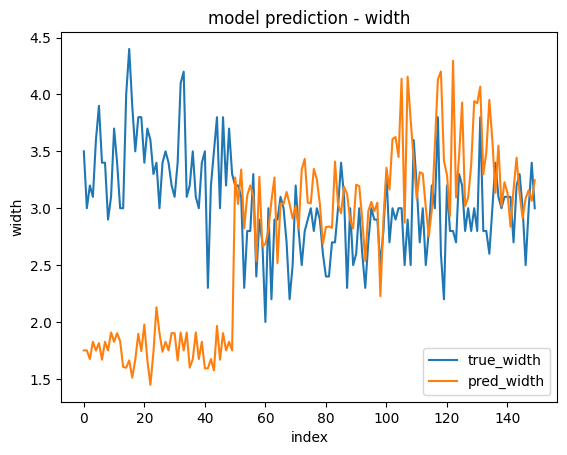

In [370]:
#새로운 데이터 예측값 시각화하기
plt.plot(y['sepal_width'], label=('true_width'))
plt.plot(y_predict[:, 1], label=('pred_width'))

plt.title('model prediction - width')
plt.xlabel('index')
plt.ylabel('width')

plt.legend()
plt.show()



In [296]:
df_iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [285]:
df_iris.loc[df_iris['species_encoded'] == 1].head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
50,7.0,3.2,4.7,1.4,Iris-versicolor,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,1
52,6.9,3.1,4.9,1.5,Iris-versicolor,1
53,5.5,2.3,4.0,1.3,Iris-versicolor,1
54,6.5,2.8,4.6,1.5,Iris-versicolor,1
